Open Normal Logs

In [35]:
import sys
sys.path.append('../')

import os
import re
import json
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
import numpy as np
from logparser import Spell, Drain
from data_process import parser, mapping, openstack_sampling

# get [log key, delta time] as input for deeplog
input_dir  = './datasets'
output_dir = './output/openstack/'  # The output directory of parsing results
# log_file   = "OpenStack_2k.log"
# log_file   = "OpenStack_mini.log"
# log_file   = "OpenStack_abnormal.log"
# log_file   = "merged_logs.log"
normal1_log_file = "openstack_normal1.log"
normal2_log_file = "openstack_normal2.log"
abnormal_log_file = "openstack_abnormal.log"
log_file = "common.log"
log_structured_file = output_dir + log_file + "_structured.csv"
log_templates_file = output_dir + log_file + "_templates.csv"
log_sequence_file = output_dir + "openstack_sequence.csv"

log_format = '<Logrecord> <Date> <Time> <Pid> <Level> <Component> <ADDR> <Content>'  # OS log format

In [36]:
# Define file names
normal_1_file = './datasets'+"/openstack_normal1.log"
normal_2_file = './datasets'+"/openstack_normal1.log"
abnormal_file = './datasets'+"/openstack_abnormal.log"
common_file = './datasets'+"/common.log"

# Count lines in normal log
with open(normal_1_file, "r") as f:    
    normal_1_len = sum(1 for _ in f)  # Efficient line countingco# Count lines in normal log
with open(normal_2_file, "r") as f:   
    normal_2_len = sum(1 for _ in f)  # Efficient line counting

# Count lines in abnormal log
with open(abnormal_file, "r") as f:
    abnormal_len = sum(1 for _ in f)

# Append both files into common.log
with open(common_file, "w") as out_f:
    # Write content of normal file
    with open(normal_1_file, "r") as f:
        out_f.write(f.read())
    
    with open(normal_2_file, "r") as f:
        out_f.write(f.read())
    
    # Write content of abnormal file
    with open(abnormal_file, "r") as f:
        out_f.write(f.read())

# Print results
print(f"Lines in {normal_1_file}: {normal_1_len}")
print(f"Lines in {normal_2_file}: {normal_2_len}")
print(f"Lines in {abnormal_file}: {abnormal_len}")
print(f"Appended both logs into {common_file}")

Lines in ./datasets/openstack_normal1.log: 52312
Lines in ./datasets/openstack_normal1.log: 52312
Lines in ./datasets/openstack_abnormal.log: 18434
Appended both logs into ./datasets/common.log


In [37]:
print(normal_1_len, normal_2_len, abnormal_len)

52312 52312 18434


In [38]:
log_file = 'common.log'  # Use the common log file for processing

In [39]:
parser(input_dir, output_dir, log_file, log_format, 'drain')
# mapping()
# openstack_sampling(log_structured_file)

Parsing file: ./datasets\common.log
in Exception in log_to_dataframe

 nova-compute.log.1.2017-05-16_13:55:31 2017-05-16 03:19:45.356 2931 ERROR oslo_service.periodic_task
 count:  27202
'NoneType' object has no attribute 'group'
in Exception in log_to_dataframe

 nova-compute.log.1.2017-05-16_13:55:31 2017-05-16 03:19:45.356 2931 ERROR oslo_service.periodic_task
 count:  79513
'NoneType' object has no attribute 'group'
Total size after encoding is 123054 123056
logdf shape:  (123054, 9)
logdf columns:  Index(['Logrecord', 'Date', 'Time', 'Pid', 'Level', 'Component', 'ADDR',
       'Content', 'type'],
      dtype='object')
##########100.0% of log lines.
Outputting results...
Parsing done. [Time taken: 0:00:10.576751]


In [40]:
log_structured_file = output_dir + log_file + "_structured.csv"
print(log_structured_file)
common_log_pd = pd.read_csv(log_structured_file, sep=',', encoding='utf-8')
common_log_pd.describe()

./output/openstack/common.log_structured.csv


,Pid,LineId
count,123054.000000,123054.00000
mean,15122.557007,61527.50000
std,11385.577086,35522.77435
min,2931.000000,1.00000
25%,2931.000000,30764.25000
50%,25746.000000,61527.50000
75%,25746.000000,92290.75000
max,25998.000000,123054.00000


In [41]:
common_log_pd.shape

(123054, 13)

In [42]:
common_log_pd_compute = common_log_pd[common_log_pd['Component']!='nova.metadata.wsgi.server']
print(common_log_pd_compute.shape)


(110050, 13)


In [48]:
import re


# Regular expression for extracting UUIDs
regex_pattern = r'([a-f0-9]{8}-[a-f0-9]{4}-[1-5][a-f0-9]{3}-[89ab][a-f0-9]{3}-[a-f0-9]{12})'

# Extract matching text into 'ComputeInstance' column
common_log_pd_compute['ComputeInstance'] = common_log_pd_compute['Content'].str.extract(regex_pattern)
#common_log_pd_compute=common_log_pd_compute[common_log_pd_compute['ComputeInstance'].notnull()]


C:\Users\sanja\AppData\Local\Temp\ipykernel_9052\2214910549.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_log_pd_compute['ComputeInstance'] = common_log_pd_compute['Content'].str.extract(regex_pattern)


In [ ]:
#common_log_pd_compute[common_log_pd_compute['ComputeInstance'].isna()]['Content'].unique()



array([], dtype=object)

In [49]:
common_log_pd_compute.to_csv('compute_output.csv', index=False)


In [ ]:
compute_inst_pd = pd.read_csv('compute_output.csv', sep=',', encoding='utf-8')
compute_inst_pd['E_id'].value_counts().sort_index(ascending=False)

E_id
E9999         1
E9998         1
E9997         1
E9996         1
E9995         1
          ...  
E10000        1
E1000         1
E100          1
E10           1
E1        44424
Name: count, Length: 33497, dtype: int64

In [56]:
# Load the dataframe
common_pd = pd.read_csv('./output/openstack/common.log_structured.csv', sep=',', encoding='utf-8')

# Load the JSON mapping
with open('./output/openstack/openstack_log_templates.json', 'r') as f:
    template_map = json.load(f)

# Map Event_Id to the value in the JSON and create new column
common_pd['E_Id_2'] = common_pd['EventId'].map(lambda eid: f"E{template_map.get(str(eid), '')}")

# Display the first few rows to verify
common_pd['E_Id_2'].value_counts().sort_values(ascending=False)
common_pd['E_Id_2'].unique()

array(['E1', 'E13', 'E12', 'E7', 'E2', 'E3', 'E4', 'E18', 'E5', 'E6',
       'E15', 'E16', 'E11', 'E36', 'E37', 'E38', 'E35', 'E28', 'E29',
       'E30', 'E33', 'E32', 'E27', 'E20', 'E8', 'E9', 'E31', 'E34', 'E19',
       'E21', 'E22', 'E26', 'E23', 'E25', 'E24', 'E17', 'E14', 'E10',
       'E40', 'E43', 'E39', 'E41', 'E42', 'E44', 'E45', 'E46', 'E47',
       'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56',
       'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65',
       'E66', 'E67', 'E68', 'E69', 'E70', 'E'], dtype=object)

In [ ]:
import re

# Regular expression for extracting UUIDs
regex_pattern = r'([a-f0-9]{8}-[a-f0-9]{4}-[1-5][a-f0-9]{3}-[89ab][a-f0-9]{3}-[a-f0-9]{12})'

common_pd['ComputeInstance'] = common_pd['Content'].str.extract(regex_pattern)
#compute_common_pd=common_pd[common_pd['ComputeInstance'].notnull()]
anomaly_uuids = [
    '544fd51c-4edc-4780-baae-ba1d80a0acfc',
    'ae651dff-c7ad-43d6-ac96-bbcd820ccca8',
    'a445709b-6ad0-40ec-8860-bec60b6ca0c2',
    '1643649d-2f42-4303-bfcd-7798baec19f9'
]
common_pd.loc[common_pd['ComputeInstance'].isin(anomaly_uuids), 'type'] = 'anomaly'

common_pd.loc[common_pd['ComputeInstance'].isin(anomaly_uuids), 'type'] = 'anomaly'`
# compute_common_pd=

,Logrecord,Date,Time,Pid,Level,Component,ADDR,Content,type,LineId,EventId,EventTemplate,E_id,E_Id_2,ComputeInstance
6,nova-compute.log.1.2017-05-16_13:55:31,2017-05-16,00:00:04.500,2931,INFO,nova.compute.manager,[req-3ea4052c-895d-4b64-9e2d-04d64c4d94ab,- - - - -] [instance: b9000564-fe1a-409b-b8cc-...,normal,7,e62ddd64,[instance: <*>] VM Started (Lifecycle Event),E2,E13,b9000564-fe1a-409b-b8cc-1e88b294cd1d
7,nova-compute.log.1.2017-05-16_13:55:31,2017-05-16,00:00:04.562,2931,INFO,nova.compute.manager,[req-3ea4052c-895d-4b64-9e2d-04d64c4d94ab,- - - - -] [instance: b9000564-fe1a-409b-b8cc-...,normal,8,3f57c2b3,[instance: <*>] VM Paused (Lifecycle Event),E3,E12,b9000564-fe1a-409b-b8cc-1e88b294cd1d
8,nova-compute.log.1.2017-05-16_13:55:31,2017-05-16,00:00:04.693,2931,INFO,nova.compute.manager,[req-3ea4052c-895d-4b64-9e2d-04d64c4d94ab,- - - - -] [instance: b9000564-fe1a-409b-b8cc-...,normal,9,47f4680b,[instance: <*>] During sync_power_state the in...,E4,E7,b9000564-fe1a-409b-b8cc-1e88b294cd1d
11,nova-compute.log.1.2017-05-16_13:55:31,2017-05-16,00:00:05.185,2931,INFO,nova.virt.libvirt.imagecache,[req-addc1839-2ed5-4778-b57e-5854eb7b8b09,- - - - -] image 0673dd71-34c5-4fbb-86c4-40623...,normal,12,904416f0,image <*> at (<*>): checking,E5,E2,0673dd71-34c5-4fbb-86c4-40623fbe45b4
12,nova-compute.log.1.2017-05-16_13:55:31,2017-05-16,00:00:05.186,2931,INFO,nova.virt.libvirt.imagecache,[req-addc1839-2ed5-4778-b57e-5854eb7b8b09,- - - - -] image 0673dd71-34c5-4fbb-86c4-40623...,normal,13,1ea73ca5,image <*> at (<*>): in use: on this node <*> l...,E6,E3,0673dd71-34c5-4fbb-86c4-40623fbe45b4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123047,nova-compute.log.2017-05-14_21:56:26,2017-05-14,21:56:20.139,2931,INFO,nova.virt.libvirt.imagecache,[req-addc1839-2ed5-4778-b57e-5854eb7b8b09,- - - - -] image 0673dd71-34c5-4fbb-86c4-40623...,abnormal,123048,904416f0,image <*> at (<*>): checking,E33494,E2,0673dd71-34c5-4fbb-86c4-40623fbe45b4
123048,nova-compute.log.2017-05-14_21:56:26,2017-05-14,21:56:20.141,2931,INFO,nova.virt.libvirt.imagecache,[req-addc1839-2ed5-4778-b57e-5854eb7b8b09,- - - - -] image 0673dd71-34c5-4fbb-86c4-40623...,abnormal,123049,1ea73ca5,image <*> at (<*>): in use: on this node <*> l...,E6,E3,0673dd71-34c5-4fbb-86c4-40623fbe45b4
123049,nova-compute.log.2017-05-14_21:56:26,2017-05-14,21:56:20.169,2931,INFO,nova.compute.manager,[req-5ea748e3-f320-422e-910f-c17e50d4007c,113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e4...,abnormal,123050,e51c49ab,[instance: <*>] Took <*> seconds to build inst...,E15,E11,5b98ace2-4126-46c3-a43e-1e1d879f0a8f
123051,nova-compute.log.2017-05-14_21:56:26,2017-05-14,21:56:25.365,2931,INFO,nova.virt.libvirt.imagecache,[req-addc1839-2ed5-4778-b57e-5854eb7b8b09,- - - - -] image 0673dd71-34c5-4fbb-86c4-40623...,abnormal,123052,904416f0,image <*> at (<*>): checking,E33496,E2,0673dd71-34c5-4fbb-86c4-40623fbe45b4


In [60]:
common_pd.columns

Index(['Logrecord', 'Date', 'Time', 'Pid', 'Level', 'Component', 'ADDR',
       'Content', 'type', 'LineId', 'EventId', 'EventTemplate', 'E_id',
       'E_Id_2', 'ComputeInstance'],
      dtype='object')

In [65]:
common_ComputeInstance_pd = common_pd.copy()
# common_ComputeInstance_pd = common_ComputeInstance_pd[common_ComputeInstance_pd['Component'] != 'nova.metadata.wsgi.server']
common_ComputeInstance_pd = common_ComputeInstance_pd[common_ComputeInstance_pd['ComputeInstance'].notnull()]
common_ComputeInstance_pd.to_csv('common_ComputeInstance_pd.csv', index=False)

In [10]:
# 1. Group by 'ComputeInstance' and calculate average number of entries per instance
avg_entries_per_instance = common_pd.groupby('ComputeInstance').size().mean()

# 2. Get entry counts per instance and display in descending order
entries_per_instance = common_pd.groupby('ComputeInstance').size().reset_index(name='entry_count')
entries_per_instance_sorted = entries_per_instance.sort_values(by='entry_count', ascending=False)

print(f"Average number of entries per ComputeInstance: {avg_entries_per_instance}")
display(entries_per_instance_sorted)

Average number of entries per ComputeInstance: 30.986754966887418


,ComputeInstance,entry_count
48,0673dd71-34c5-4fbb-86c4-40623fbe45b4,10218
136,16797a0f-32fb-494c-8f36-38588148c35d,60
1152,c6289e85-a048-42bd-b32a-427cc1b12ef5,56
186,1dbcdff4-2bc2-431f-9444-b2e855d74da5,56
1121,bf8c824d-f099-4433-a41e-e3da7578262e,56
...,...,...
18,02206311-17ca-4dbd-9b3d-0bc89723acb4,1
23,02d66584-4fc8-434d-9cff-f40818d26e6c,1
31,04a59468-ec27-4cdd-81ac-5fe78aa5aba9,1
1472,f962f316-9b97-436e-a24c-71be5791ede9,1


Average number of entries per ComputeInstance: 24.235917826375083


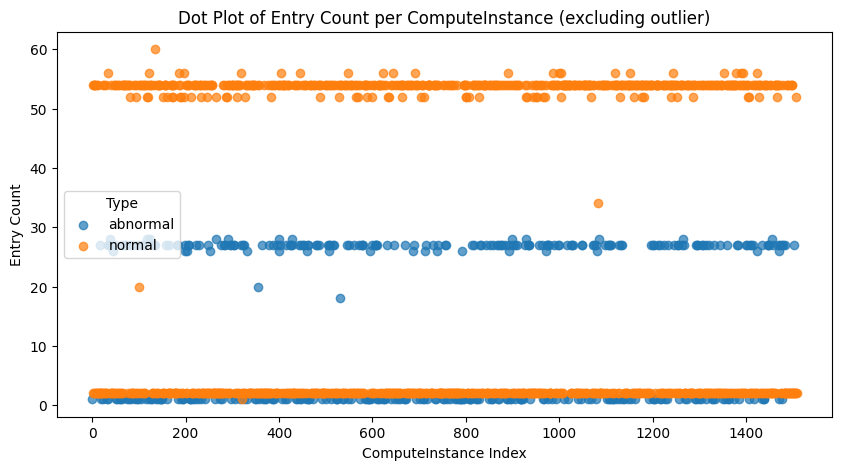

In [11]:
# 1. Remove all entries with the specified ComputeInstance
filtered_common_pd = common_pd[common_pd['ComputeInstance'] != "0673dd71-34c5-4fbb-86c4-40623fbe45b4"]

# 2. Compute average number of entries per ComputeInstance
instance_counts = (
    filtered_common_pd.groupby(['ComputeInstance', 'type'])
    .size()
    .reset_index(name='entry_count')
)
avg_entries = instance_counts['entry_count'].mean()
print(f"Average number of entries per ComputeInstance: {avg_entries}")

# 3. Generate a dot plot for 'entry_count', color-coded by 'type'
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for t, group in instance_counts.groupby('type'):
    plt.scatter(group.index, group['entry_count'], label=t, alpha=0.7)

plt.xlabel('ComputeInstance Index')
plt.ylabel('Entry Count')
plt.title('Dot Plot of Entry Count per ComputeInstance (excluding outlier)')
plt.legend(title='Type')
plt.show()

In [12]:
# List of ComputeInstance IDs to mark as 'Anomaly'
anomaly_instances = [
    '544fd51c-4edc-4780-baae-ba1d80a0acfc',
    'ae651dff-c7ad-43d6-ac96-bbcd820ccca8',
    'a445709b-6ad0-40ec-8860-bec60b6ca0c2',
    '1643649d-2f42-4303-bfcd-7798baec19f9'
]

# Update the 'type' column for these ComputeInstances
common_pd.loc[common_pd['ComputeInstance'].isin(anomaly_instances), 'type'] = 'anomaly'

Average number of entries per ComputeInstance: 24.235917826375083


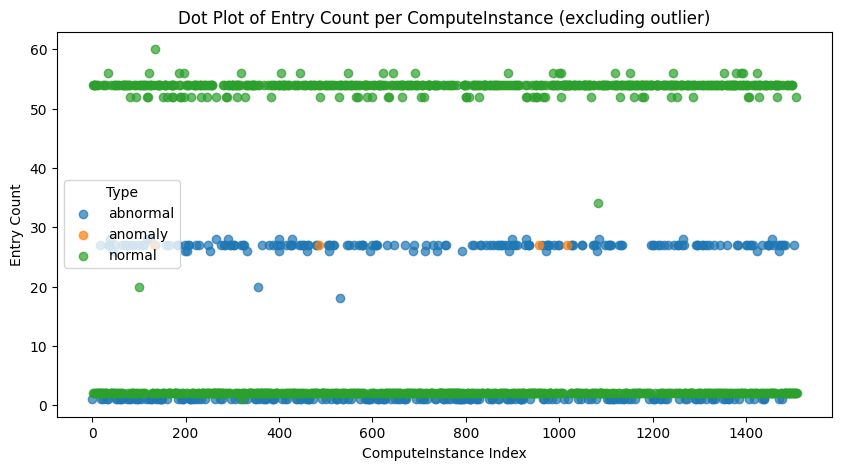

In [13]:
# 1. Remove all entries with the specified ComputeInstance
filtered_common_pd = common_pd[common_pd['ComputeInstance'] != "0673dd71-34c5-4fbb-86c4-40623fbe45b4"]

# 2. Compute average number of entries per ComputeInstance
instance_counts = (
    filtered_common_pd.groupby(['ComputeInstance', 'type'])
    .size()
    .reset_index(name='entry_count')
)
avg_entries = instance_counts['entry_count'].mean()
print(f"Average number of entries per ComputeInstance: {avg_entries}")

# 3. Generate a dot plot for 'entry_count', color-coded by 'type'
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for t, group in instance_counts.groupby('type'):
    plt.scatter(group.index, group['entry_count'], label=t, alpha=0.7)

plt.xlabel('ComputeInstance Index')
plt.ylabel('Entry Count')
plt.title('Dot Plot of Entry Count per ComputeInstance (excluding outlier)')
plt.legend(title='Type')
plt.show()

In [14]:
labels = [
    'abnormal',
    'anomaly'
    ]

# Update the 'type' column for these ComputeInstances
only_abnormal = common_pd.loc[common_pd['type'].isin(labels)] 

In [15]:
only_abnormal.columns

Index(['Logrecord', 'Date', 'Time', 'Pid', 'Level', 'Component', 'ADDR',
       'Content', 'type', 'LineId', 'EventId', 'EventTemplate', 'E_id',
       'E_Id_2', 'ComputeInstance'],
      dtype='object')

Average number of entries per ComputeInstance (abnormal): 17.78030303030303


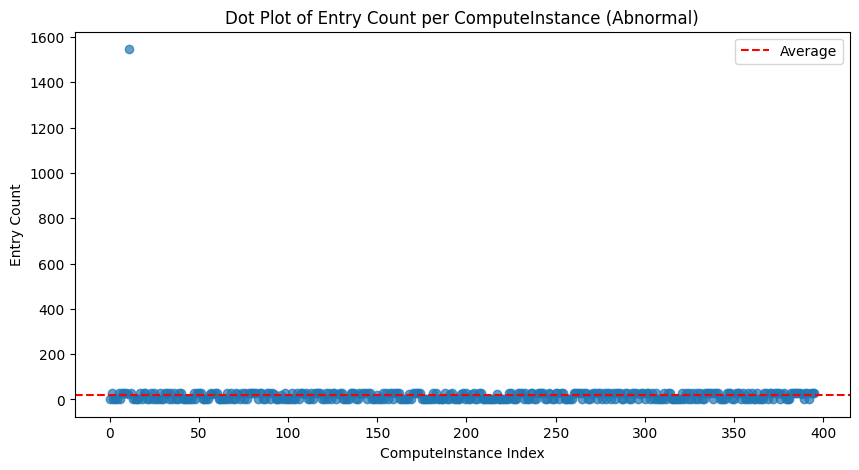

In [16]:
import matplotlib.pyplot as plt

# Group by 'ComputeInstance' and count entries
abnormal_instance_counts = (
    only_abnormal.groupby('ComputeInstance')
    .size()
    .reset_index(name='entry_count')
)

# Compute average
avg_abnormal_entries = abnormal_instance_counts['entry_count'].mean()
print(f"Average number of entries per ComputeInstance (abnormal): {avg_abnormal_entries}")

# Dot plot
plt.figure(figsize=(10, 5))
plt.scatter(abnormal_instance_counts.index, abnormal_instance_counts['entry_count'], alpha=0.7)
plt.axhline(avg_abnormal_entries, color='red', linestyle='--', label='Average')
plt.xlabel('ComputeInstance Index')
plt.ylabel('Entry Count')
plt.title('Dot Plot of Entry Count per ComputeInstance (Abnormal)')
plt.legend()
plt.show()

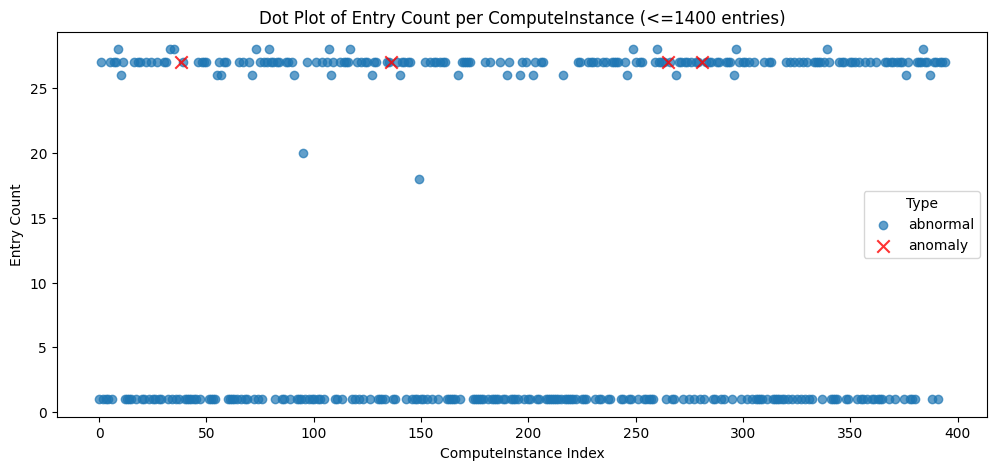

In [18]:
# Remove ComputeInstance with more than 1400 entries
filtered_abnormal_instance_counts = abnormal_instance_counts[abnormal_instance_counts['entry_count'] <= 1400]

# Merge with only_abnormal to get 'type' info (if not already present)
plot_df = filtered_abnormal_instance_counts.merge(
    only_abnormal[['ComputeInstance', 'type']].drop_duplicates(),
    on='ComputeInstance',
    how='left'
)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
for t, group in plot_df.groupby('type'):
    if t == 'anomaly':
        plt.scatter(group.index, group['entry_count'], color='red', label='anomaly', alpha=0.8, marker='x', s=80)
    else:
        plt.scatter(group.index, group['entry_count'], label=t, alpha=0.7)

plt.xlabel('ComputeInstance Index')
plt.ylabel('Entry Count')
plt.title('Dot Plot of Entry Count per ComputeInstance (<=1400 entries)')
plt.legend(title='Type')
plt.show()

  E_Id_2      type  count  percentage
0      E  abnormal      1    0.005959
1      E    normal      1    0.001042
2     E1  abnormal   8613   51.328963
3     E1   anomaly      4    3.703704
4     E1    normal  48721   50.778547


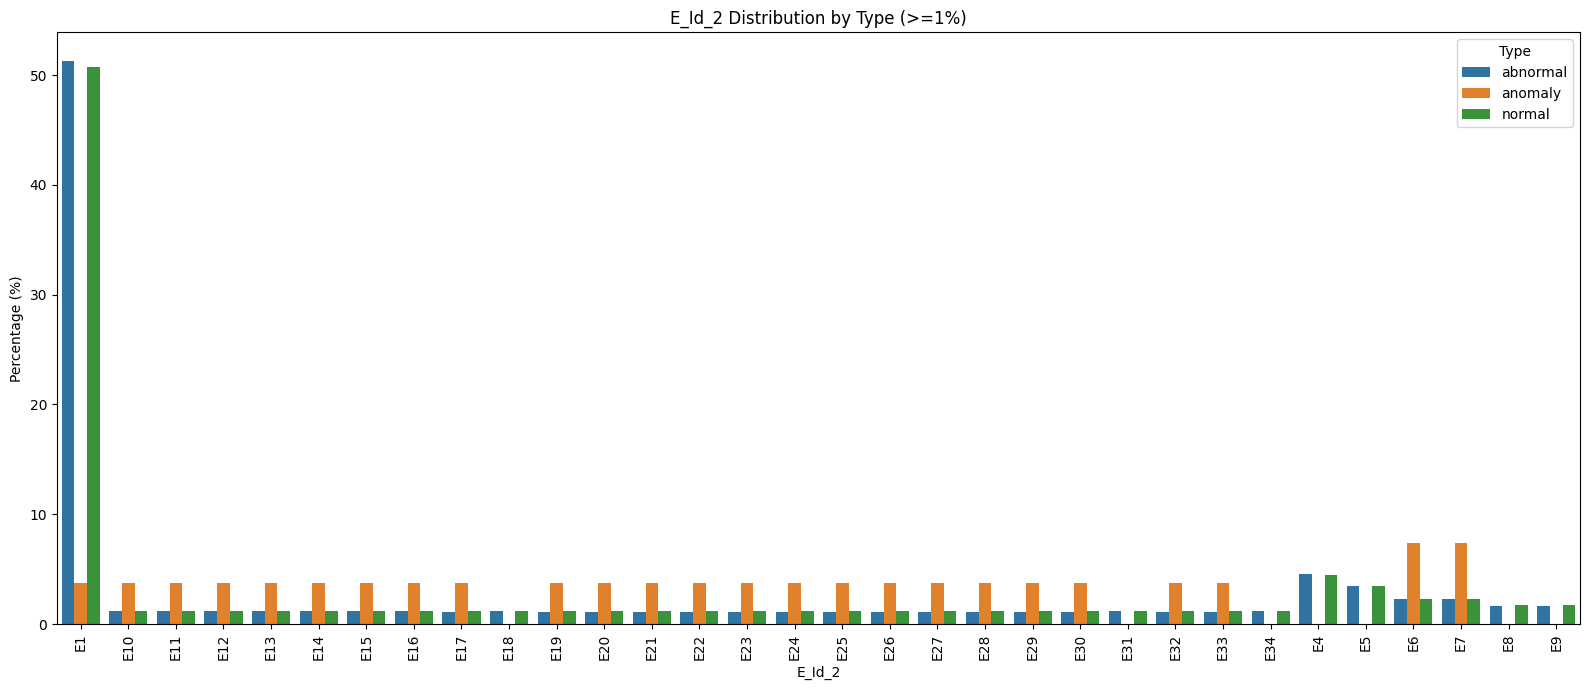

In [34]:
import seaborn as sns

# 1. Remove the 1400+ specific ComputeInstance from 'filtered_common_pd'
filtered_common_pd_no_large = filtered_common_pd[filtered_common_pd['ComputeInstance'] != '0673dd71-34c5-4fbb-86c4-40623fbe45b4']

# 2. Calculate percentage of E_Id_2 grouped by type and E_Id_2
eid2_type_counts = (
    filtered_common_pd_no_large
    .groupby(['E_Id_2', 'type'])
    .size()
    .reset_index(name='count')
)

total_per_type = eid2_type_counts.groupby('type')['count'].transform('sum')
eid2_type_counts['percentage'] = 100 * eid2_type_counts['count'] / total_per_type

# 3. Display head
print(eid2_type_counts.head())

# 4. Filter out tags under 1%
eid2_type_counts_filtered = eid2_type_counts[eid2_type_counts['percentage'] >= 1]

# 5. Render graph for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))
sns.barplot(
    data=eid2_type_counts_filtered,
    x='E_Id_2',
    y='percentage',
    hue='type'
)
plt.xticks(rotation=90)
plt.ylabel('Percentage (%)')
plt.title('E_Id_2 Distribution by Type (>=1%)')
plt.legend(title='Type')
plt.tight_layout()
plt.show()